## Fengxian District Active Power Data Analysis & Optimization

In [95]:
import pandas as pd
df = pd.read_csv("data.csv")
df['时间'] = pd.to_datetime(df['时间'],format='%Y/%m/%d %H:%M')
df['日期'] = df['时间'].dt.date
df = df.dropna(subset=['日期'])
df = df.sort_values(by='时间').reset_index(drop=True)
df


,时间,有功功率,功率因素,Unnamed: 3,日期
0,2024-05-24 00:00:00,0.1260,160.0,20.160,2024-05-24
1,2024-05-24 00:15:00,0.1318,160.0,21.088,2024-05-24
2,2024-05-24 00:30:00,0.1295,160.0,20.720,2024-05-24
3,2024-05-24 00:45:00,0.1577,160.0,25.232,2024-05-24
4,2024-05-24 01:00:00,0.0762,160.0,12.192,2024-05-24
...,...,...,...,...,...
715,2024-05-31 11:00:00,0.1124,160.0,17.984,2024-05-31
716,2024-05-31 11:15:00,0.0868,160.0,13.888,2024-05-31
717,2024-05-31 11:30:00,0.0874,160.0,13.984,2024-05-31
718,2024-05-31 11:45:00,0.1099,160.0,17.584,2024-05-31


### 任务1
台区96个点负荷数据中包含过去7天运行情况，请编写函数调用该表数据估计近七天峰谷开始及结束时间，如早高峰7点-9点  晚高峰6点到8点...

In [96]:
def find_peak(df):
    peak_intervals = []
    for date, group in df.groupby('日期'):
        # Morning peak 6 AM to 10 AM
        morning_peak = group[(group['时间'].dt.hour >= 6) & (group['时间'].dt.hour < 10)]
        if not morning_peak.empty:
            morning_peak = morning_peak.set_index('时间').resample('15T')['有功功率'].mean()
            morning_max_idx = morning_peak.rolling(window=8).mean().idxmax()
            morning_start = morning_max_idx - pd.Timedelta(minutes=52.5)
            morning_end = morning_max_idx + pd.Timedelta(minutes=67.5)
        # Evening peak 4 PM to 8 PM
        evening_peak = group[(group['时间'].dt.hour >= 16) & (group['时间'].dt.hour < 20)]
        if not evening_peak.empty:
            evening_peak = evening_peak.set_index('时间').resample('15T')['有功功率'].mean()
            evening_max_idx = evening_peak.rolling(window=8).mean().idxmax()
            evening_start = evening_max_idx - pd.Timedelta(minutes=112.5)
            evening_end = evening_max_idx + pd.Timedelta(minutes=127.5)

        peak_intervals.append({
            '日期': date,
            '早高峰开始': morning_start,
            '早高峰结束': morning_end,
            '晚高峰开始': evening_start,
            '晚高峰结束': evening_end
        })

    return pd.DataFrame(peak_intervals)

peak_intervals_df = find_peak(df)
peak_intervals_df


/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_35778/1133608028.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  morning_peak = morning_peak.set_index('时间').resample('15T')['有功功率'].mean()
/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_35778/1133608028.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  evening_peak = evening_peak.set_index('时间').resample('15T')['有功功率'].mean()
/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_35778/1133608028.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  morning_peak = morning_peak.set_index('时间').resample('15T')['有功功率'].mean()
/var/folders/92/8b71n6kj0h33ch61yv1mfqxw0000gn/T/ipykernel_35778/1133608028.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  evening_peak = evening_peak.set_index

,日期,早高峰开始,早高峰结束,晚高峰开始,晚高峰结束
0,2024-05-24,2024-05-24 07:07:30,2024-05-24 09:07:30,2024-05-24 17:22:30,2024-05-24 21:22:30
1,2024-05-25,2024-05-25 07:07:30,2024-05-25 09:07:30,2024-05-25 15:52:30,2024-05-25 19:52:30
2,2024-05-26,2024-05-26 07:52:30,2024-05-26 09:52:30,2024-05-26 15:52:30,2024-05-26 19:52:30
3,2024-05-27,2024-05-27 06:52:30,2024-05-27 08:52:30,2024-05-27 17:52:30,2024-05-27 21:52:30
4,2024-05-28,2024-05-28 06:52:30,2024-05-28 08:52:30,2024-05-28 17:52:30,2024-05-28 21:52:30
5,2024-05-29,2024-05-29 08:52:30,2024-05-29 10:52:30,2024-05-29 16:07:30,2024-05-29 20:07:30
6,2024-05-30,2024-05-30 08:52:30,2024-05-30 10:52:30,2024-05-30 16:37:30,2024-05-30 20:37:30
7,2024-05-31,2024-05-31 08:52:30,2024-05-31 10:52:30,2024-05-30 16:37:30,2024-05-30 20:37:30


/Users/maxz/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maxz/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21151 (\N{CJK UNIFIED IDEOGRAPH-529F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maxz/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


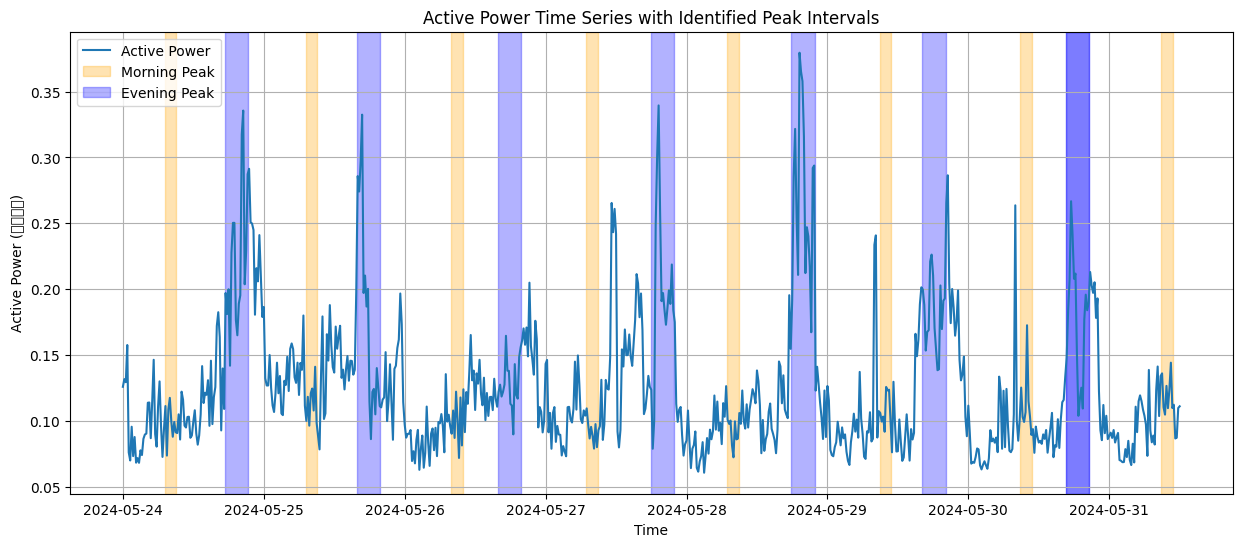

In [97]:
import matplotlib.pyplot as plt

def plot_peak_intervals(df, peak_intervals_df):
    plt.figure(figsize=(15, 6))

    plt.plot(df['时间'], df['有功功率'], label='Active Power')
    for _, row in peak_intervals_df.iterrows():
        if pd.notnull(row['早高峰开始']):
            plt.axvspan(row['早高峰开始'], row['早高峰结束'], color='orange', alpha=0.3, label='Morning Peak' if _ == 0 else "")
        if pd.notnull(row['晚高峰开始']):
            plt.axvspan(row['晚高峰开始'], row['晚高峰结束'], color='blue', alpha=0.3, label='Evening Peak' if _ == 0 else "")
    
    plt.xlabel('Time')
    plt.ylabel('Active Power (有功功率)')
    plt.title('Active Power Time Series with Identified Peak Intervals')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_peak_intervals(df, peak_intervals_df)


### 任务2
台区96个点（每天）×7天表，编写函数调用该表数据，输出近七日平均负荷曲线，即96个点从00:00 - 23:45的平均负荷值

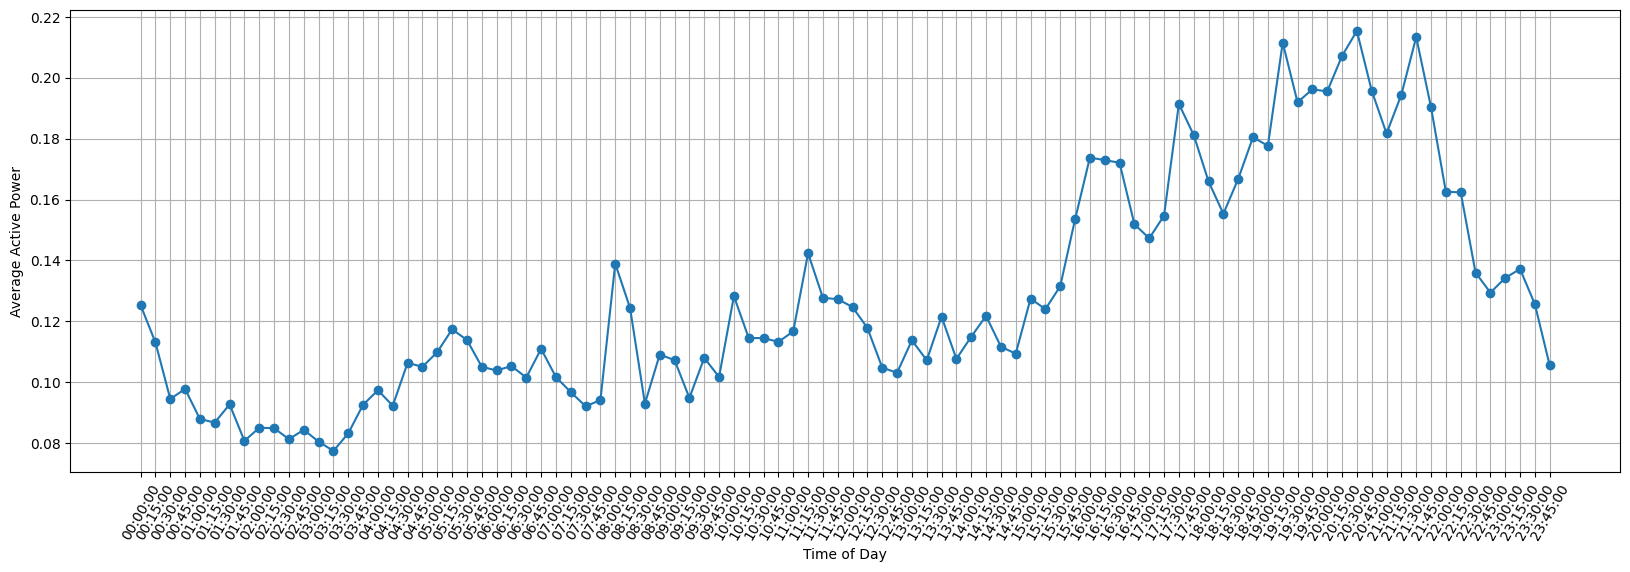

In [98]:
df['时刻'] = df['时间'].dt.time
averagepower = df.groupby('时刻')['有功功率'].mean().reset_index()
averagepower['时刻'] = averagepower['时刻'].astype(str)
plt.figure(figsize=(20, 6))
averageplot = plt.plot(averagepower['时刻'], averagepower['有功功率'],marker='o')
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel('Time of Day')
plt.ylabel('Average Active Power')
plt.show()

### 任务3
每小时平均&标准差

In [102]:
df['hour'] = df['时间'].dt.hour
hourly_stats = df.groupby('hour')['有功功率'].agg(['mean', 'std']).reset_index()
hourly_stats

,hour,mean,std
0,0,0.107052,0.029029
1,1,0.086972,0.018762
2,2,0.083847,0.020777
3,3,0.083381,0.018028
4,4,0.100225,0.022122
5,5,0.111519,0.023804
6,6,0.105369,0.024429
7,7,0.096119,0.013568
8,8,0.116309,0.046166
9,9,0.102906,0.016214


### 任务4
均值，均值+STD，均值-STD曲线

([<matplotlib.axis.XTick at 0x16aa65940>,
 [Text(0, 0, '0:00'),
  Text(1, 0, '1:00'),
  Text(2, 0, '2:00'),
  Text(3, 0, '3:00'),
  Text(4, 0, '4:00'),
  Text(5, 0, '5:00'),
  Text(6, 0, '6:00'),
  Text(7, 0, '7:00'),
  Text(8, 0, '8:00'),
  Text(9, 0, '9:00'),
  Text(10, 0, '10:00'),
  Text(11, 0, '11:00'),
  Text(12, 0, '12:00'),
  Text(13, 0, '13:00'),
  Text(14, 0, '14:00'),
  Text(15, 0, '15:00'),
  Text(16, 0, '16:00'),
  Text(17, 0, '17:00'),
  Text(18, 0, '18:00'),
  Text(19, 0, '19:00'),
  Text(20, 0, '20:00'),
  Text(21, 0, '21:00'),
  Text(22, 0, '22:00'),
  Text(23, 0, '23:00')])

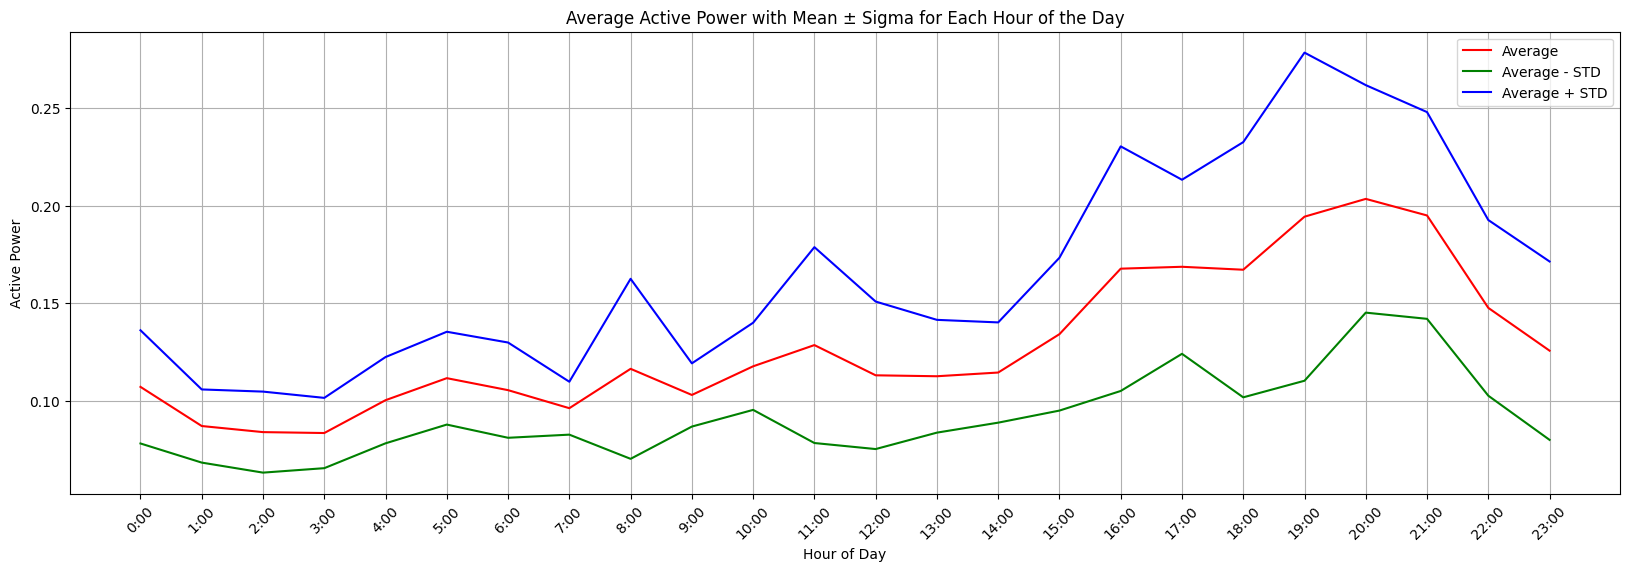

In [103]:
hourly_stats['mean_minus_std'] = hourly_stats['mean'] - hourly_stats['std']
hourly_stats['mean_plus_std'] = hourly_stats['mean'] + hourly_stats['std']
plt.figure(figsize=(20, 6))
plt.plot(hourly_stats['hour'],hourly_stats['mean'],color='red',label = 'Average')
plt.plot(hourly_stats['hour'],hourly_stats['mean_minus_std'],color = 'green',label = 'Average - STD')
plt.plot(hourly_stats['hour'],hourly_stats['mean_plus_std'],color = 'blue',label = 'Average + STD')
plt.legend()
plt.title('Average Active Power with Mean ± Sigma for Each Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Active Power')
plt.grid(True)
plt.xticks(ticks=range(24), labels=[f"{hour}:00" for hour in range(24)], rotation=45)


### 任务5
20% 80% 置信区间

([<matplotlib.axis.XTick at 0x16aa97ef0>,
 [Text(0, 0, '0:00'),
  Text(1, 0, '1:00'),
  Text(2, 0, '2:00'),
  Text(3, 0, '3:00'),
  Text(4, 0, '4:00'),
  Text(5, 0, '5:00'),
  Text(6, 0, '6:00'),
  Text(7, 0, '7:00'),
  Text(8, 0, '8:00'),
  Text(9, 0, '9:00'),
  Text(10, 0, '10:00'),
  Text(11, 0, '11:00'),
  Text(12, 0, '12:00'),
  Text(13, 0, '13:00'),
  Text(14, 0, '14:00'),
  Text(15, 0, '15:00'),
  Text(16, 0, '16:00'),
  Text(17, 0, '17:00'),
  Text(18, 0, '18:00'),
  Text(19, 0, '19:00'),
  Text(20, 0, '20:00'),
  Text(21, 0, '21:00'),
  Text(22, 0, '22:00'),
  Text(23, 0, '23:00')])

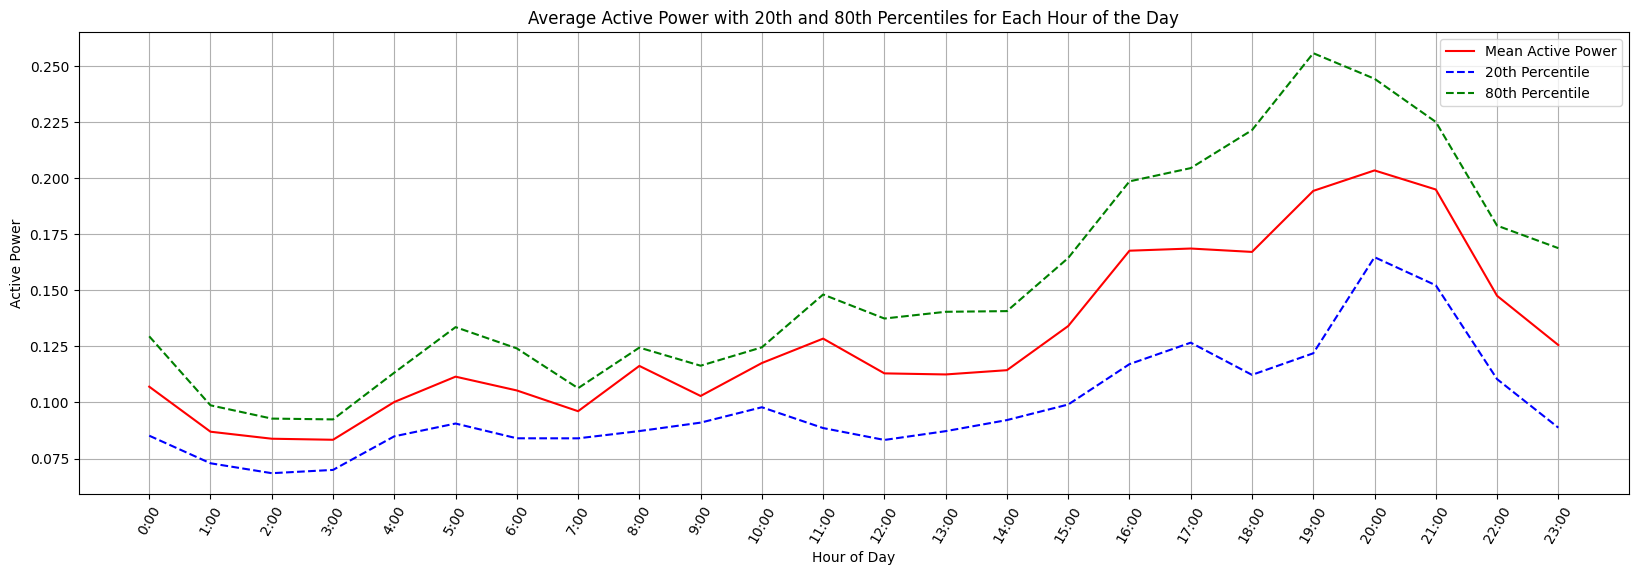

In [105]:
hourly_stats = df.groupby('hour')['有功功率'].agg(['mean', lambda x: x.quantile(0.2), lambda x: x.quantile(0.8)]).reset_index()
hourly_stats.columns = ['hour', 'mean', '20th_percentile', '80th_percentile']
plt.figure(figsize=(20, 6))
plt.plot(hourly_stats['hour'], hourly_stats['mean'], color='red', label='Mean Active Power')
plt.plot(hourly_stats['hour'], hourly_stats['20th_percentile'], color='blue', linestyle='--', label='20th Percentile')
plt.plot(hourly_stats['hour'], hourly_stats['80th_percentile'], color='green', linestyle='--', label='80th Percentile')
plt.xlabel('Hour of Day')
plt.ylabel('Active Power')
plt.title('Average Active Power with 20th and 80th Percentiles for Each Hour of the Day')
plt.grid(True)
plt.legend()
plt.xticks(ticks=range(24), labels=[f"{hour}:00" for hour in range(24)], rotation=60)

([<matplotlib.axis.XTick at 0x16b667320>,
 [Text(0, 0, '0:00'),
  Text(1, 0, '1:00'),
  Text(2, 0, '2:00'),
  Text(3, 0, '3:00'),
  Text(4, 0, '4:00'),
  Text(5, 0, '5:00'),
  Text(6, 0, '6:00'),
  Text(7, 0, '7:00'),
  Text(8, 0, '8:00'),
  Text(9, 0, '9:00'),
  Text(10, 0, '10:00'),
  Text(11, 0, '11:00'),
  Text(12, 0, '12:00'),
  Text(13, 0, '13:00'),
  Text(14, 0, '14:00'),
  Text(15, 0, '15:00'),
  Text(16, 0, '16:00'),
  Text(17, 0, '17:00'),
  Text(18, 0, '18:00'),
  Text(19, 0, '19:00'),
  Text(20, 0, '20:00'),
  Text(21, 0, '21:00'),
  Text(22, 0, '22:00'),
  Text(23, 0, '23:00')])

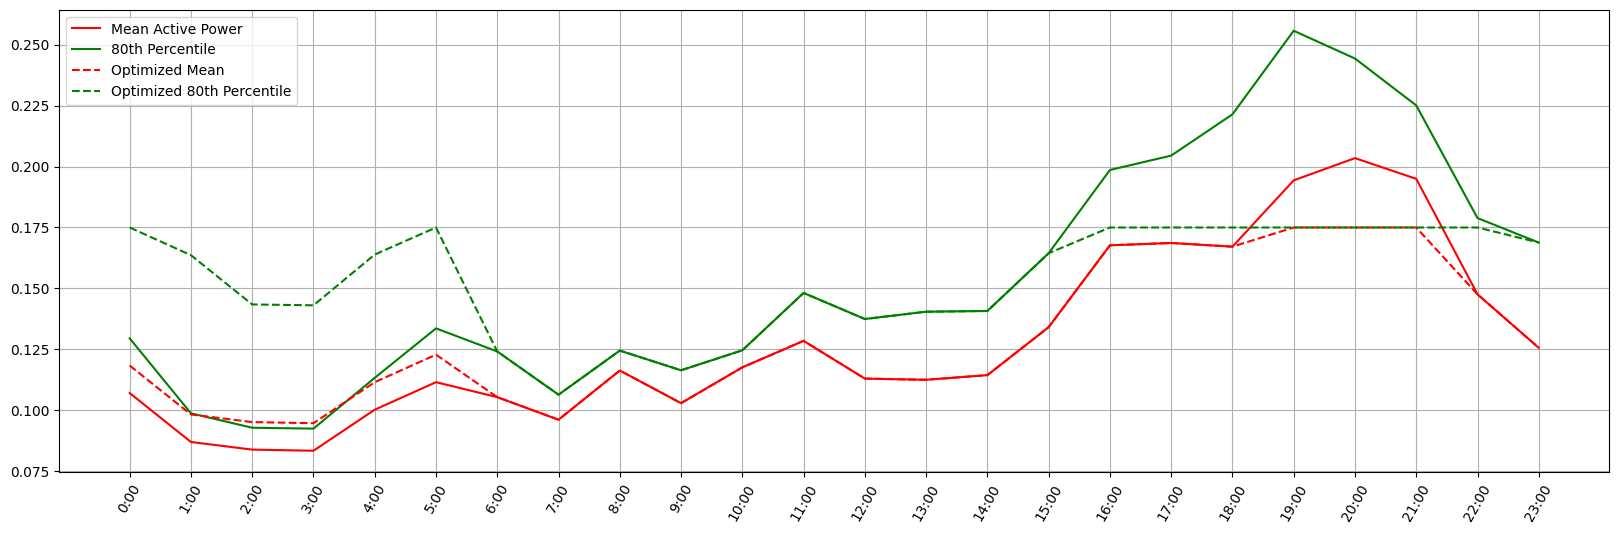

In [113]:
threshold = 0.175
excess_mean = hourly_stats['mean'] - threshold
excess_mean[excess_mean < 0] = 0
excess_p80 = hourly_stats['80th_percentile'] - threshold
excess_p80[excess_p80 < 0] = 0

total_excess_mean = excess_mean.sum()
total_excess_p80 = excess_p80.sum()

trough_period_hours = range(0, 6)
trough_count = len(trough_period_hours)
mean_distribution = total_excess_mean / trough_count
p80_distribution = total_excess_p80 / trough_count

new_mean = hourly_stats['mean'].copy()
new_p80 = hourly_stats['80th_percentile'].copy()
new_mean[hourly_stats['mean'] > threshold] = threshold
new_p80[hourly_stats['80th_percentile'] > threshold] = threshold

for hour in trough_period_hours:
    new_mean[hour] += mean_distribution
    new_p80[hour] += p80_distribution

excess_in_trough = new_p80[trough_period_hours] - threshold
while any(excess_in_trough > 0):
    for i, hour in enumerate(trough_period_hours):
        if new_p80[hour] > threshold:
            excess = new_p80[hour] - threshold
            new_p80[hour] -= excess
            for j in trough_period_hours:
                if new_p80[j] < threshold:
                    deficit = threshold - new_p80[j]
                    transfer = min(excess, deficit)
                    new_p80[j] += transfer
                    excess -= transfer
                    if excess <= 0:
                        break
    excess_in_trough = new_p80[trough_period_hours] - threshold


optimized_curve = pd.DataFrame({
    'hour': hourly_stats['hour'],
    'new_mean': new_mean,
    'new_p80': new_p80})

plt.figure(figsize=(20,6))
plt.plot(hourly_stats['hour'], hourly_stats['mean'], color='red', label='Mean Active Power')
plt.plot(hourly_stats['hour'], hourly_stats['80th_percentile'], color='green', label='80th Percentile')
plt.plot(hourly_stats['hour'], new_mean, color='red',label='Optimized Mean',linestyle='--')
plt.plot(hourly_stats['hour'], new_p80, color='green',linestyle='--',label='Optimized 80th Percentile')
plt.grid(True)
plt.legend()
plt.xticks(ticks=range(24), labels=[f"{hour}:00" for hour in range(24)], rotation=60)